In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=(10,10)

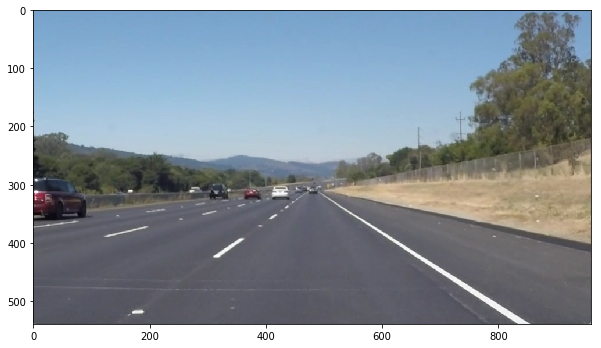

In [21]:
img = cv.imread("solidWhiteRight.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

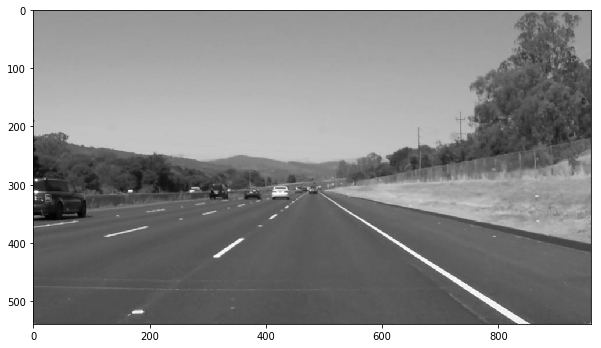

In [22]:
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

## Guassian Blur

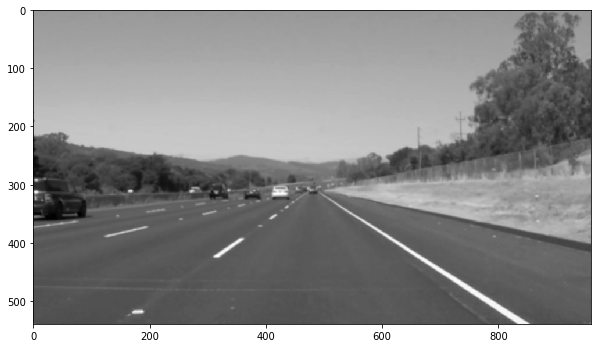

In [25]:
img_blur = cv.GaussianBlur(img_gray,(5,5),0)
plt.imshow(img_blur,cmap='gray')

## Canny Edge Detection 

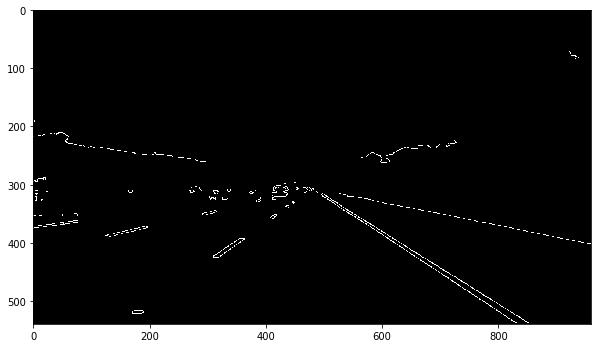

In [30]:
img_canny = cv.Canny(img_blur,120,240)
plt.imshow(img_canny,cmap='gray')

In [34]:
# lines = cv.HoughLinesP(img_canny,
#               rho=6,
#               theta=np.pi/60,
#               threshold=140,
#               lines = np.array([]),
#               minLineLength=40,
#               maxLineGap=5
#              )

In [37]:
lines.shape

(22, 1, 4)

In [50]:
# p = lines.reshape(-1,4)

In [39]:
p.shape

(22, 4)

In [42]:
p[0]

array([559, 354, 662, 420], dtype=int32)

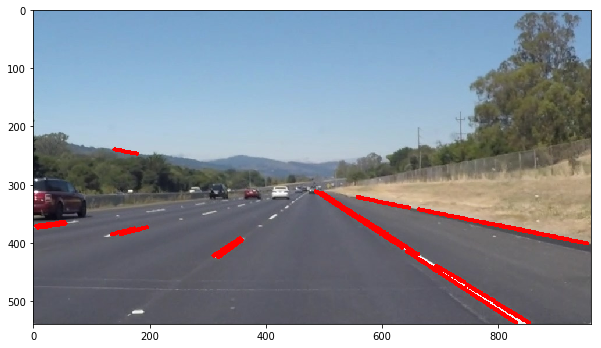

In [43]:
img_test = img.copy()
for line in p:
    x1,y1,x2,y2 = line
    cv.line(img_test,(x1,y1),(x2,y2),(255,0,0),5)
    
plt.imshow(img_test)

In [46]:
def get_vertice(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.1,  rows*0.95]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.9,  rows*0.95]
    top_right    = [cols*0.55, rows*0.6] 
    
    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [51]:
get_vertice(img)

array([[[ 96, 513],
        [432, 324],
        [528, 324],
        [864, 513]]], dtype=int32)

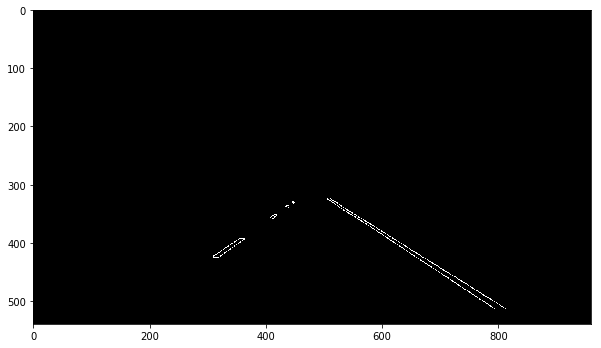

In [56]:
mask = np.zeros_like(img_canny)
points = get_vertice(img)
cv.fillPoly(mask,points,(255,255,255))
com=cv.bitwise_and(img_canny,mask)
plt.imshow(com,cmap='gray')

In [57]:
lines = cv.HoughLinesP(com,
              rho=6,
              theta=np.pi/60,
              threshold=140,
              lines = np.array([]),
              minLineLength=40,
              maxLineGap=5
             )

In [58]:
lines

array([[[505, 324, 738, 476]],

       [[721, 455, 805, 509]],

       [[570, 362, 617, 390]],

       [[539, 343, 593, 375]],

       [[310, 422, 357, 392]],

       [[764, 482, 812, 513]]], dtype=int32)

In [63]:
lines = lines.reshape(-1,4)

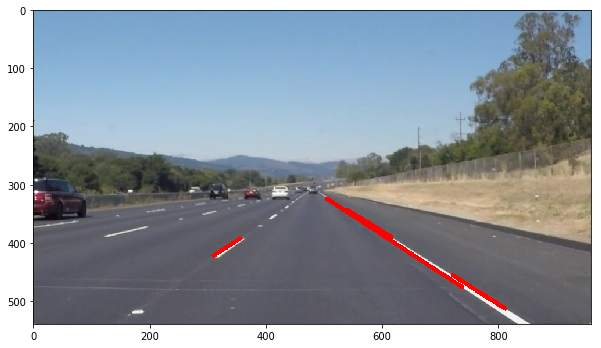

In [65]:
dg = img.copy()
for l in lines:
    x1,y1,x2,y2 = l
    cv.line(dg,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(dg)